In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rental-apartments-in-kenya/rent_apts.csv


IMPORT THE DATASET TO BE USED

In [2]:
data = pd.read_csv("../input/rental-apartments-in-kenya/rent_apts.csv")
data

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN
...,...,...,...,...,...,...,...
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North","KSh 180,000",/listings/3-bedroom-apartment-for-rent-kileles...,3.0,3.0,NaN
1844,Dmus Realtors,"Peponi road, Spring Valley, Westlands","KSh 180,000",/listings/2-bedroom-apartment-for-rent-spring-...,2.0,2.0,2.0
1845,A1 Properties Limited,"Kileleshwa, Dagoretti North","KSh 180,000",/listings/furnished-4-bedroom-apartment-for-re...,4.0,4.0,5.0
1846,Geoscape Global Limited,"Westlands Area, Westlands","KSh 180,000",/listings/4-bedroom-apartment-for-rent-westlan...,4.0,4.0,4.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


In [4]:
data.describe()


,sq_mtrs,Bedrooms,Bathrooms
count,1846.000000,1845.000000,1557.000000
mean,327.226977,2.577778,2.595376
std,2048.784581,0.819399,1.000349
min,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,3.000000,3.000000
max,40470.000000,6.000000,6.000000


CLEAN DATA(REMOVE DUPLICATES)

1. Drop "sq_mtrs", "link" columns and all rows with zero/NaN values
2. Convert Price" to ints
3. Convert "Neighborhood" column to ints

In [5]:

 
data = data.dropna()
data

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
6,Mambo Properties Enterprise,"Off Denis Pritt, Kilimani, Dagoretti North","KSh 100,000",/listings/2-bedroom-apartment-for-rent-kiliman...,14.0,2.0,3.0
...,...,...,...,...,...,...,...
1841,Origin Homes,"Brookside Drie, Karura, Westlands","KSh 180,000",/listings/furnished-3-bedroom-apartment-for-re...,3.0,3.0,3.0
1842,Origin Homes,"Brookside, Westlands","KSh 180,000",/listings/3-bedroom-apartment-for-rent-brooksi...,3.0,3.0,4.0
1844,Dmus Realtors,"Peponi road, Spring Valley, Westlands","KSh 180,000",/listings/2-bedroom-apartment-for-rent-spring-...,2.0,2.0,2.0
1845,A1 Properties Limited,"Kileleshwa, Dagoretti North","KSh 180,000",/listings/furnished-4-bedroom-apartment-for-re...,4.0,4.0,5.0


In [6]:
# Convert Price" to ints
data["Price"] = data["Price"].str.replace("KSh ", "")
data
data["Price"] = data["Price"].str.replace(",", "")
data["Price"] = pd.to_numeric(data["Price"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1557 entries, 0 to 1846
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1557 non-null   object 
 1   Neighborhood  1557 non-null   object 
 2   Price         1557 non-null   int64  
 3   link          1557 non-null   object 
 4   sq_mtrs       1557 non-null   float64
 5   Bedrooms      1557 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 97.3+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

#print the first 5 rows

In [7]:
data.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands",155000,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000,/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000,/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000,/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
6,Mambo Properties Enterprise,"Off Denis Pritt, Kilimani, Dagoretti North",100000,/listings/2-bedroom-apartment-for-rent-kiliman...,14.0,2.0,3.0


CORRELATION BETWEEN VARIOUS FEATURES IN THE DATASET
1. Positive correlation
2. Negative correlation

In [8]:
data.corr()

,Price,sq_mtrs,Bedrooms,Bathrooms
Price,1.000000,-0.034092,0.352336,0.440472
sq_mtrs,-0.034092,1.000000,-0.013826,0.003311
Bedrooms,0.352336,-0.013826,1.000000,0.731506
Bathrooms,0.440472,0.003311,0.731506,1.000000


<AxesSubplot:>

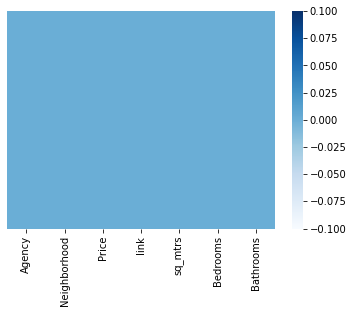

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='Blues')

SPLITTING THE DATA AND TARGET

In [10]:
X = data[["Bedrooms", "Bathrooms"]]
Y=data['Price']

In [11]:
print(X)
print(Y)

      Bedrooms  Bathrooms
0          4.0        4.0
1          3.0        4.0
2          3.0        5.0
3          3.0        4.0
6          2.0        3.0
...        ...        ...
1841       3.0        3.0
1842       3.0        4.0
1844       2.0        2.0
1845       4.0        5.0
1846       4.0        4.0

[1557 rows x 2 columns]
0       155000
1       100000
2        75000
3       135000
6       100000
         ...  
1841    180000
1842    180000
1844    180000
1845    180000
1846    180000
Name: Price, Length: 1557, dtype: int64


**SPLITTING THE DATA TO TRAINING AND TEST DATA**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [13]:
print(X.shape,X_train.shape, X_test.shape)

(1557, 2) (1245, 2) (312, 2)


 **MODEL TRAINING**

XGBRegressor

In [14]:
#loading the model
from xgboost import XGBRegressor
model=XGBRegressor()
#training the model with x_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

EVALUATION

Prediction on training data

In [15]:
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [16]:
print(training_data_prediction)

[134385.95  84054.11 109856.13 ...  84054.11 119079.7  119079.7 ]


In [17]:
from sklearn import metrics
#R squared error
score_1 =metrics.r2_score(Y_train,training_data_prediction)

#Mean absolute error
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R squared error: ", score_1)
print("Mean absolute error: ", score_2)

#If the error is closer to 0 that means our model is performing perfectly


R squared error:  0.23593260832270402
Mean absolute error:  28475.261693649598
